# Inflow Performance Relationship for partial two phase

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
Pr=float(input('Reservoir pressure=')) #static reservoir pressure (psi)
Pb=float(input('Bubble point pressure=')) #(psi)
#Entering test case
Pwf1=float(input('Flowing botttom hole pressure=')) #(psi)
Q1=float(input('Flow rate=')) #(STB/Day)

Reservoir pressure= 5000
Bubble point pressure= 3000
Flowing botttom hole pressure= 4000
Flow rate= 300


### Flow Rate for different conditions
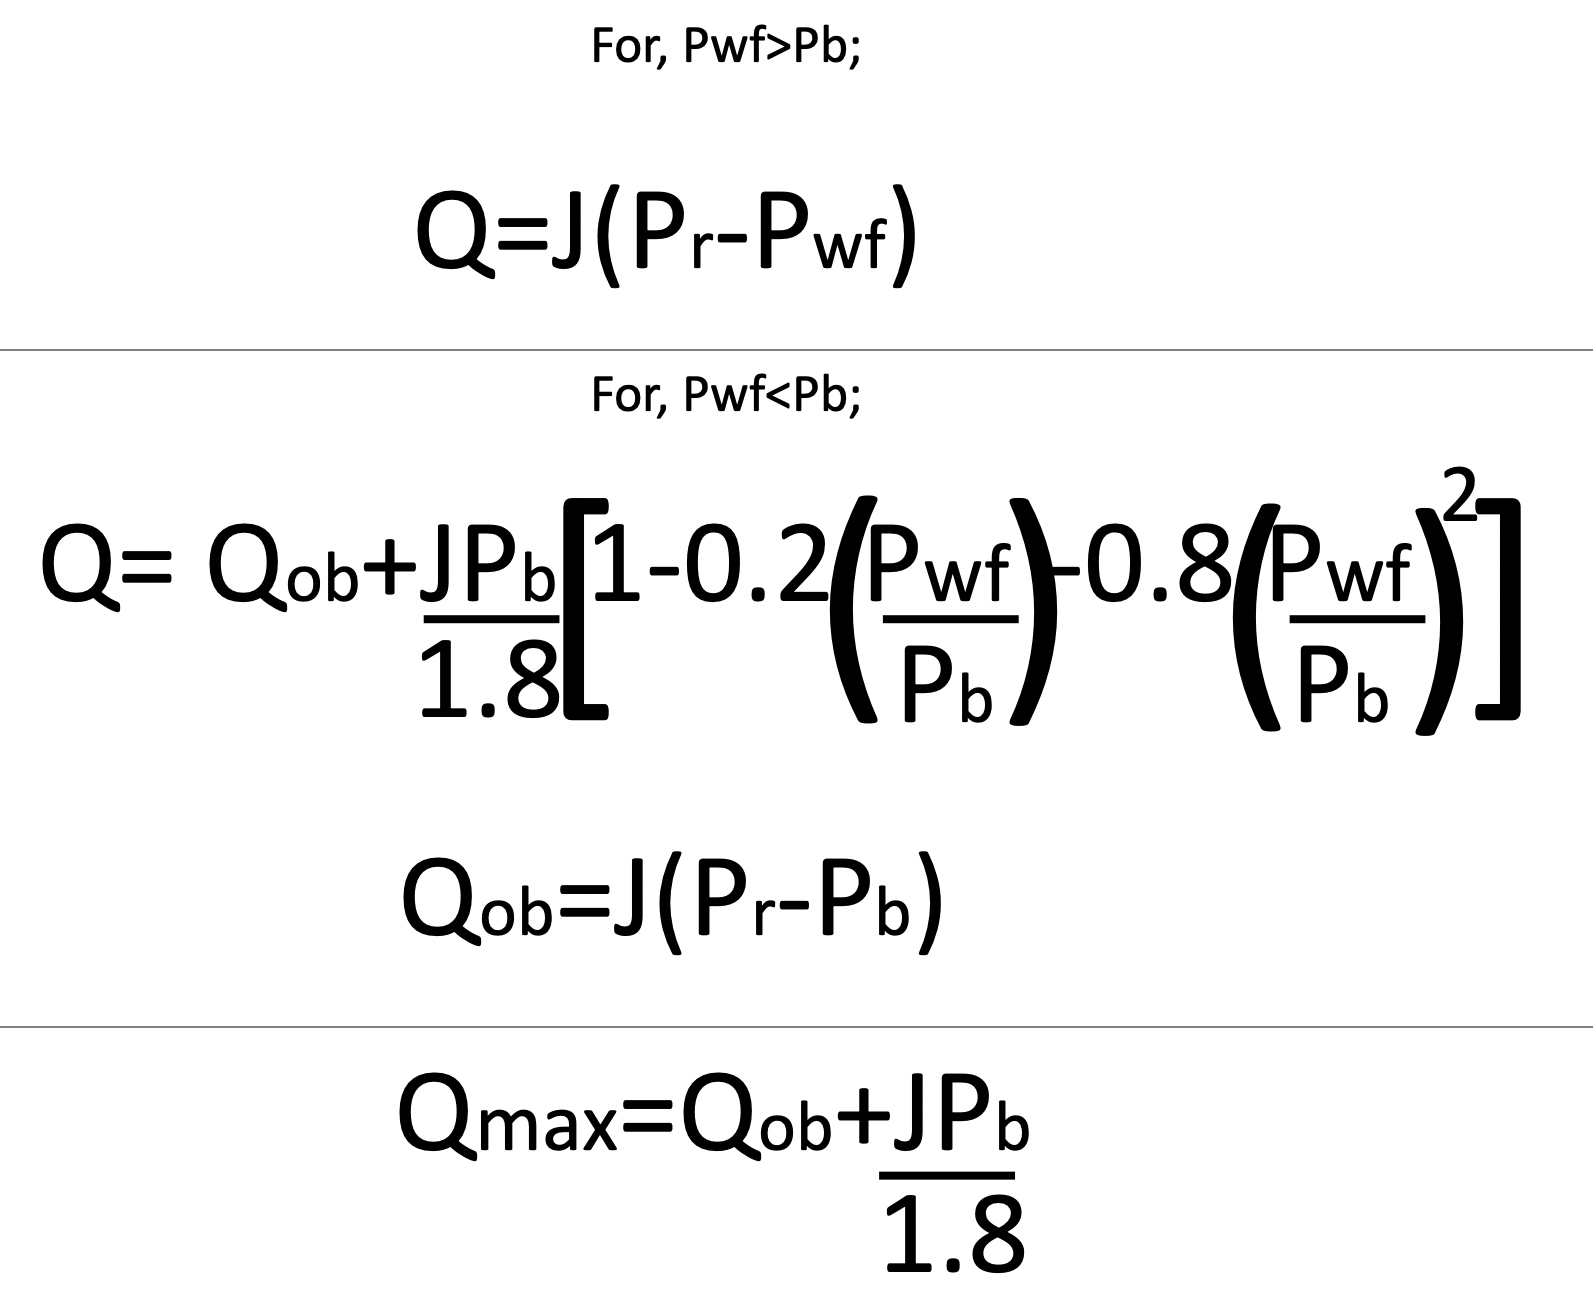

### Calculation of productivity index (J)

In [47]:
# J(STB/Day-psi)
if (Pwf1>=Pb):
    J=Q1/(Pr-Pwf1)
    print(J)
else:
    J=Q1/((Pr-Pb)+(Pb/1.8)*(1-0.2*(Pwf1/Pb)-0.8*((Pwf1/Pb)**2)))
    print(J)

0.3


In [48]:
df=pd.read_excel('IPR partial phase.xlsx',)
df.head()

,Flowing bottomhole pressure
0,5000
1,4500
2,4000
3,3500
4,3000


### Calculation of flow rate at different flowing bottom hole pressure

In [49]:
Q=[] #declaring flow rate as an empty list
Pwf=df['Flowing bottomhole pressure']
Qob=J*(Pr-Pb)
for i in Pwf:
    if (i>=Pb):
        q=J*(Pr-i) 
        Q.append(q)
    else:
        q=Qob+J*(Pb/1.8)*(1-0.2*(i/Pb)-0.8*((i/Pb)**2))
        Q.append(q)
print(*Q,sep='\n') #flow rate at different flowing bottomhole pressure (STB/Day)

0.0
150.0
300.0
450.0
600.0
738.8888888888888
855.5555555555555
950.0
1022.2222222222222
1072.2222222222222
1100.0


### Plotting the IPR curve

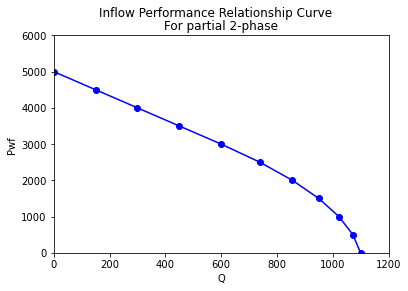

In [50]:
plt.plot(Q,Pwf,color='blue',marker='o')
plt.xlabel('Q')
plt.ylabel('Pwf')
plt.title('For partial 2-phase')
plt.suptitle('Inflow Performance Relationship Curve')
plt.xlim(xmin=0,xmax=1200)
plt.ylim(ymin=0,ymax=6000)
plt.show()